# 파이썬을 이용한 유튜브 뮤직 비디오 트렌드 분석  
- Pytrends(Google Trends용 API) 사용  
- 데이터 처리를 위한 pandas사용  
- 데이터 시각화를 위한 seaborn, matplotlib 사용  
- 지도 시각화를 위한 folium 사용

In [1]:
from pytrends.request import TrendReq

In [2]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import folium

### google trends 데이터 사용하기
- 키워드는 music video와 mv  
- 지난 5년간 youtube 검색 데이터 사용

In [61]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ['music video', 'mv']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')

### 뮤직비디오 인기 검색어 찾기  
- top : Google Trends 점수(0~100)로 순위가 매겨진 가장 인기 있는 검색어  
- rising : 특정 기간 동안 검색 빈도가 가장 많이 증가한 검색어 

In [8]:
df_queries = pytrends.related_queries()

In [11]:
top_music_video = df_queries.get('music video').get('top')
top_mv = df_queries.get('mv').get('top')
df_top = pd.concat([top_music_video, top_mv])
df_top.sort_values(['value'], ascending = False).head(5).reset_index(drop = True)

,query,value
0,official music video,100
1,mv bts,100
2,bts,96
3,music song,78
4,mv blackpink,29


In [12]:
rising_music_video = df_queries.get('music video').get('rising')
rising_mv = df_queries.get('mv').get('rising')
df_rising = pd.concat([rising_music_video, rising_mv])
df_rising.sort_values(['value'], ascending = False).head(5).reset_index(drop = True)

,query,value
0,mv blackpink,477400
1,blackpink,460750
2,gacha music video,237300
3,gacha life music video,202800
4,dynamite mv bts,169100


### 인기검색어의 시간의 경과에 따른 관심 알아보기  
- Interest Over Time 사용
- seaborn, matplotlib 사용하여 시각화

In [14]:
kw_list = ['BTS', 'Blackpink', 'Dynamite', 'Gacha']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')
df_interest = pytrends.interest_over_time().drop(columns='isPartial')

Text(0.5, 1.0, 'Music Video Trends Over Time')

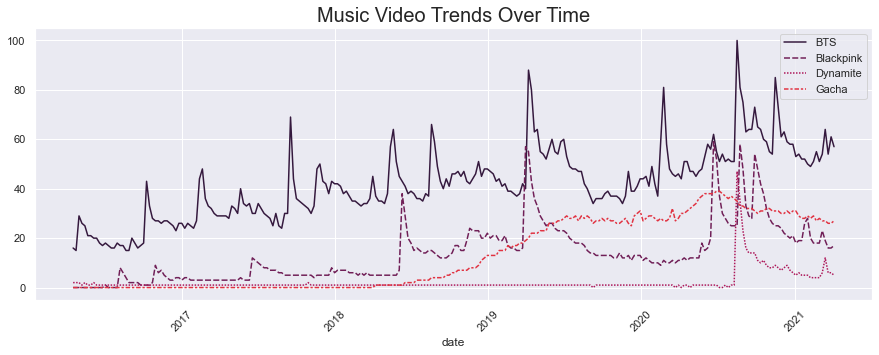

In [62]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style='darkgrid', palette='rocket')
ax = sns.lineplot(data=df_interest)
ax.set_title('Music Video Trends Over Time', fontsize=20)

### 인기검색어의 국가별 관심 알아보기
- 가장 인기 키워드인 BTS의 국가별 관심 나타내기
    - 바 차트, 지도 사용한 시각화

In [19]:
kw_list = ['BTS']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')
df_interest_region = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=False)
df = df_interest_region.sort_values(by='BTS', ascending=False).head(10).reset_index()

In [50]:
df_interest_region

,BTS
geoName,
Afghanistan,0
Albania,0
Algeria,20
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,0


### BTS MV에 가장 관심 많은 10개국 차트 나타내기
- matplotlib pyplot 사용

Text(0, 0.5, 'Value')

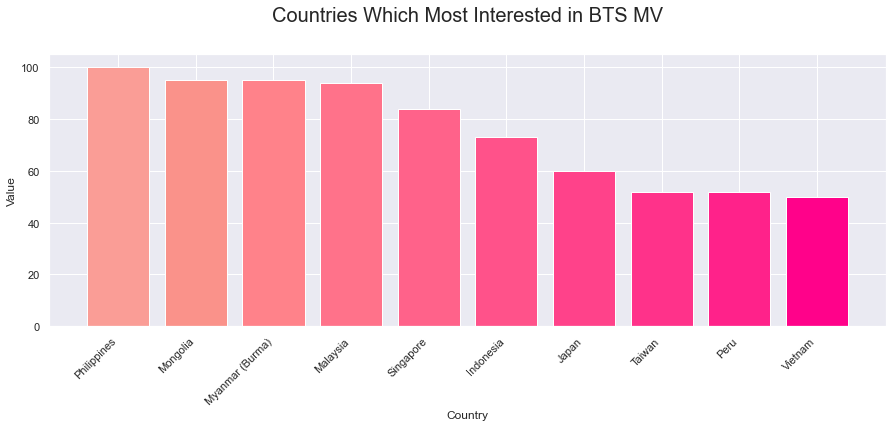

In [28]:
fig = plt.figure(figsize=(15,5))
plt.bar(df['geoName'], df['BTS'], color = ['#fa9d96','#fa928a','#ff828a','#ff728a','#ff628a','#ff528a','#ff428a','#ff328a','#ff228a','#ff028a'])
plt.xticks(rotation=45, ha='right')
plt.title('Countries Which Most Interested in BTS MV',y=1.1, fontsize=20)
plt.xlabel('Country')
plt.ylabel('Value')

### 지역별 BTS MV 관심 지도에 시각화하기
- folium 사용

In [51]:
df_df = df_interest_region.sort_values(by='BTS', ascending=False).head(250).reset_index()

In [55]:
import json
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(tiles='cartodbpositron')
map.choropleth(geo_data=country_shapes,name='choropleth',  
                   data=df_df, columns=['geoName', 'BTS'],  
                   key_on='properties.name', fill_color='RdPu',  
                   nan_fill_color='white',fill_opacity=0.8, line_opacity=0.5)
map